In [2]:
from music21 import *

In [13]:
i1 = interval.Interval('P5') # create an interval
print(i1.niceName)
i2 = interval.Interval('P4')
i3 = interval.Interval('P1')
print(i3.niceName)
i4 = interval.Interval('A5')
print(i4.niceName)
i5 = interval.Interval('d5')
print(i5.niceName)


Perfect Fifth
Perfect Unison
Augmented Fifth
Diminished Fifth


In [ ]:
print(i2.directedNiceName)
print(i2.reverse().directedNiceName)


Ascending Perfect Fourth
Descending Perfect Fourth


In [ ]:
c4 = note.Note(60)
print(c4.fullName)


In [ ]:
c4_transposed = c4.transpose(i1.reverse())  # Transpose c4 by the interval i1 (P5)
print(c4_transposed.fullName)

F in octave 3 Quarter Note


In [ ]:
print(c4.pitch.frequency)
print(c4.pitch.midi)
print(c4.pitch.pitchClass)  # MIDI class of the pitch
print(c4.quarterLength)


261.6255653005985
60
0
1.0


In [15]:
cs = note.Note('C#4')
cf = note.Note('C-4')
print(cf.pitch.midi)
print(note.Note("B3") == cf)
cq = note.Note("C~4")
print(cq.fullName)
cqf = note.Note("C`4")
print(cqf.fullName)


59
False
C-half-sharp in octave 4 Quarter Note
C-half-flat in octave 4 Quarter Note


In [18]:
cs.show("midi")

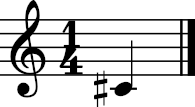

In [17]:
cs.show()

In [ ]:
from showscore import show
cf.duration = duration.Duration(3.9)  # Set the duration of cf to 1.0 quarter notes
cfff = note.Note("C--4")
csss = note.Note("C##4")
i = interval.Interval(cfff, csss)
print(i.niceName)

Quadruply-Augmented Unison


In [4]:
score = converter.parse("Beethoven__Symphony_No._5_Op.67_Mvt._1.mscz.mxl")

In [8]:
score.analyze("key")

<music21.key.Key of c minor>

In [9]:
score.flatten().notes

<music21.stream.iterator.StreamIterator for Score:0x15cb2dccca0 @:0>

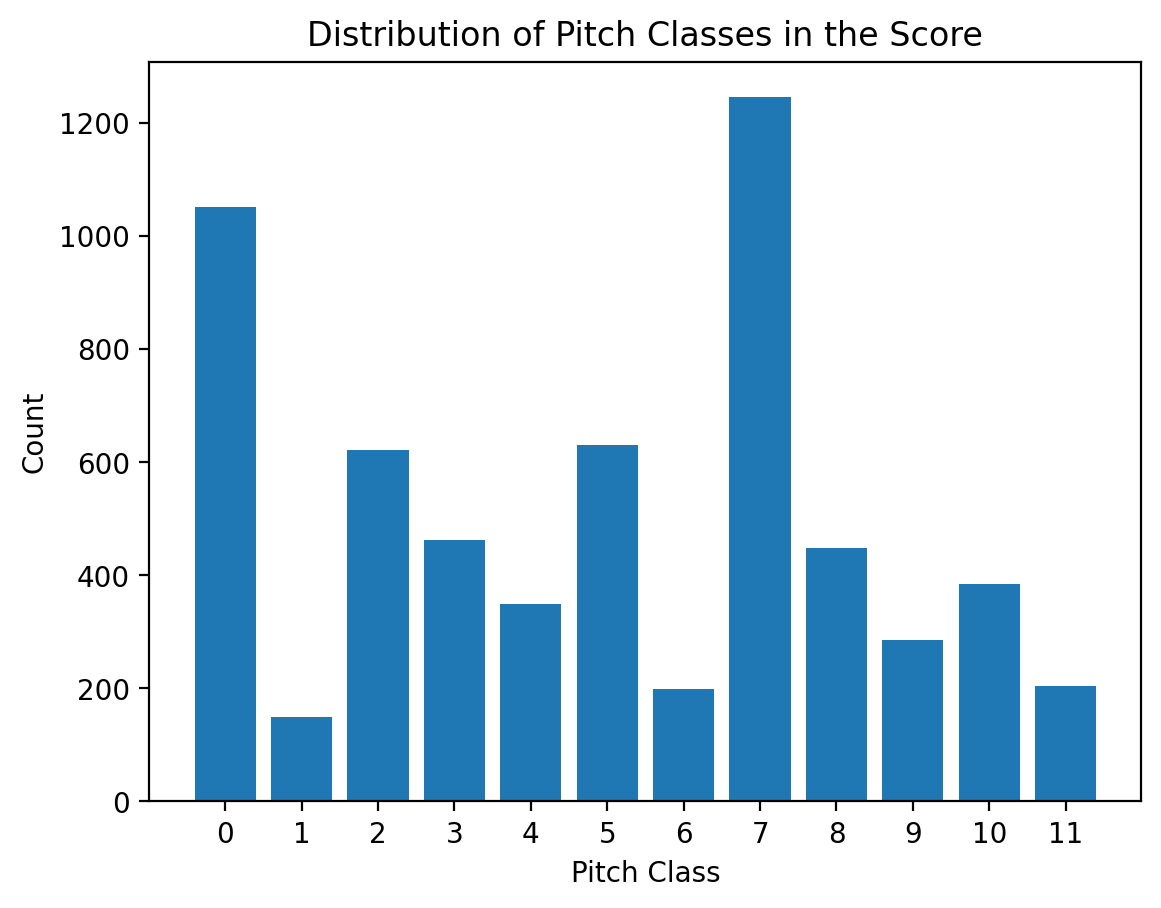

In [13]:
from collections import Counter

import matplotlib.pyplot as plt

# 获取乐谱中所有音符的 pitchClass
pitch_classes = [n.pitch.pitchClass for n in score.flatten().notes if isinstance(n, note.Note)]

# 统计每个 pitchClass 的出现次数
pitch_class_counts = Counter(pitch_classes)

# 绘制柱状图
plt.bar(pitch_class_counts.keys(), pitch_class_counts.values(), tick_label=list(pitch_class_counts.keys()))
plt.xlabel('Pitch Class')
plt.ylabel('Count')
plt.title('Distribution of Pitch Classes in the Score')
plt.show()

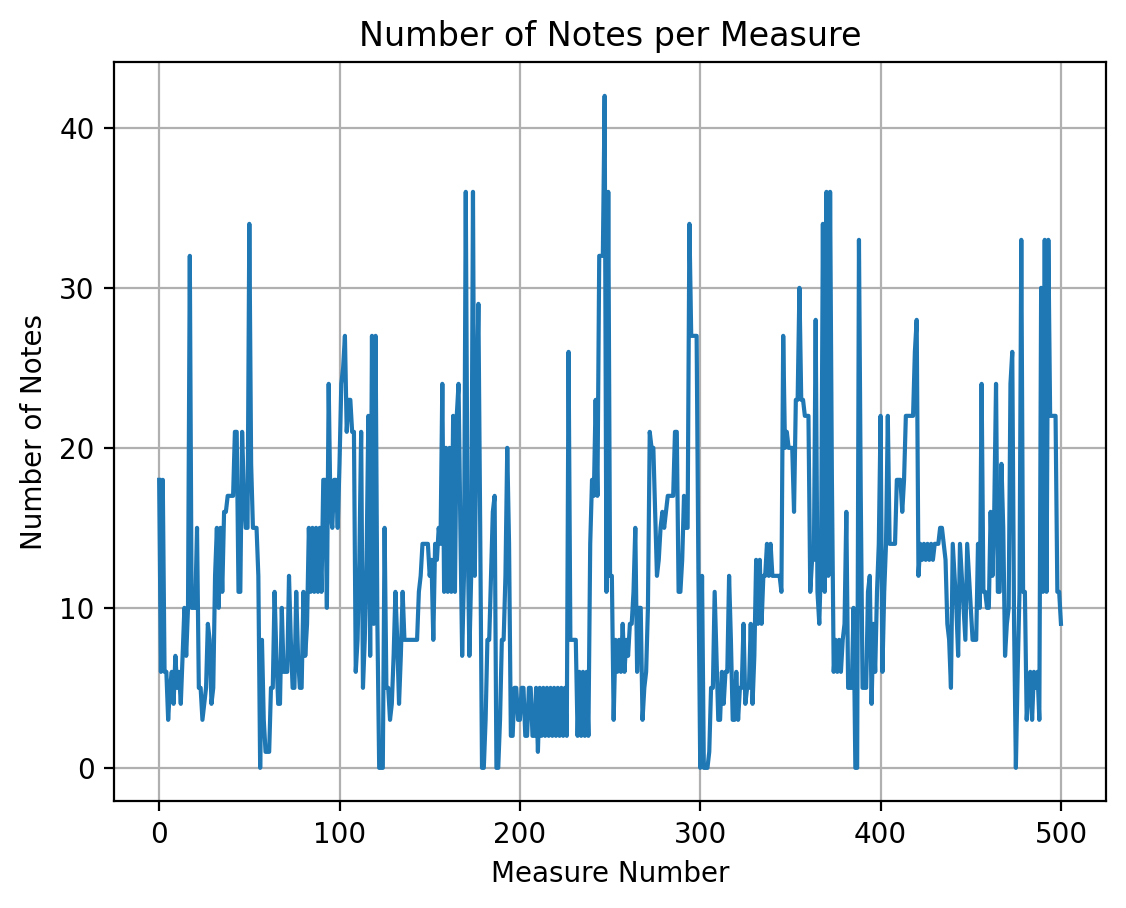

In [19]:
# 获取每个小节中的音符数量
all_parts_measures = [part.getElementsByClass('Measure') for part in score.parts]
measure_note_counts = [sum(len(measure.notes) for measure in part_measures) for part_measures in zip(*all_parts_measures)]
# 绘制每个小节的音符数量折线图
plt.plot(measure_note_counts)
plt.xlabel('Measure Number')
plt.ylabel('Number of Notes')
plt.title('Number of Notes per Measure')
plt.grid(True)
plt.show()


In [11]:
from music21 import *

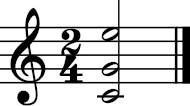

In [23]:
chord1 = chord.Chord(["C4", "G4", "E5"])
chord1.duration.type = "half"
chord2 = chord.Chord([60, 64, 67])
# print(chord2.pitches)
chord1.show()

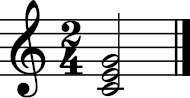

In [25]:
chord1_closed = chord1.closedPosition()
chord1_closed.show()

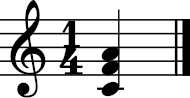

In [27]:
chord3 = chord.Chord("C F A", quarterLength=1.0)
chord3.show()

F5
C5
Chord {C in octave 5 | F in octave 5 | A} Quarter
major triad
F-major triad
64
Second Inversion


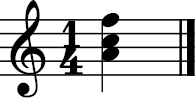

6


In [40]:
print(chord3.root())
print(chord3.bass())
print(chord3.fullName)
print(chord3.commonName)
print(chord3.pitchedCommonName)
print(chord3.inversionName())
print(chord3.inversionText())
chord3_inversion1 = chord.Chord(chord3)
chord3_inversion1.inversion(1)
chord3_inversion1.show()
print(chord3_inversion1.inversionName())

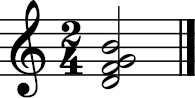

In [42]:
chord4 = chord.Chord("D F G B", quarterLength=2.0)
chord4.show()

In [45]:
print(chord4.root())
print(chord4.bass())
print(chord4.fullName)
print(chord4.commonName)
print(chord4.pitchedCommonName)
print(chord4.inversionName())
print(chord4.inversionText())

G
D
Chord {D | F | G | B} Half
dominant seventh chord
G-dominant seventh chord
43
Second Inversion


In [46]:
chord_x = chord.Chord("C D E F#")
chord_x.pitchedCommonName

'D-whole-tone tetramirror'

In [44]:
us = environment.UserSettings()
us["musescoreDirectPNGPath"]

WindowsPath('C:/Program Files/MuseScore 4/bin/MuseScore4.exe')

In [51]:
roman.romanNumeralFromChord(chord4, key.Key("C")).figure

'V43'

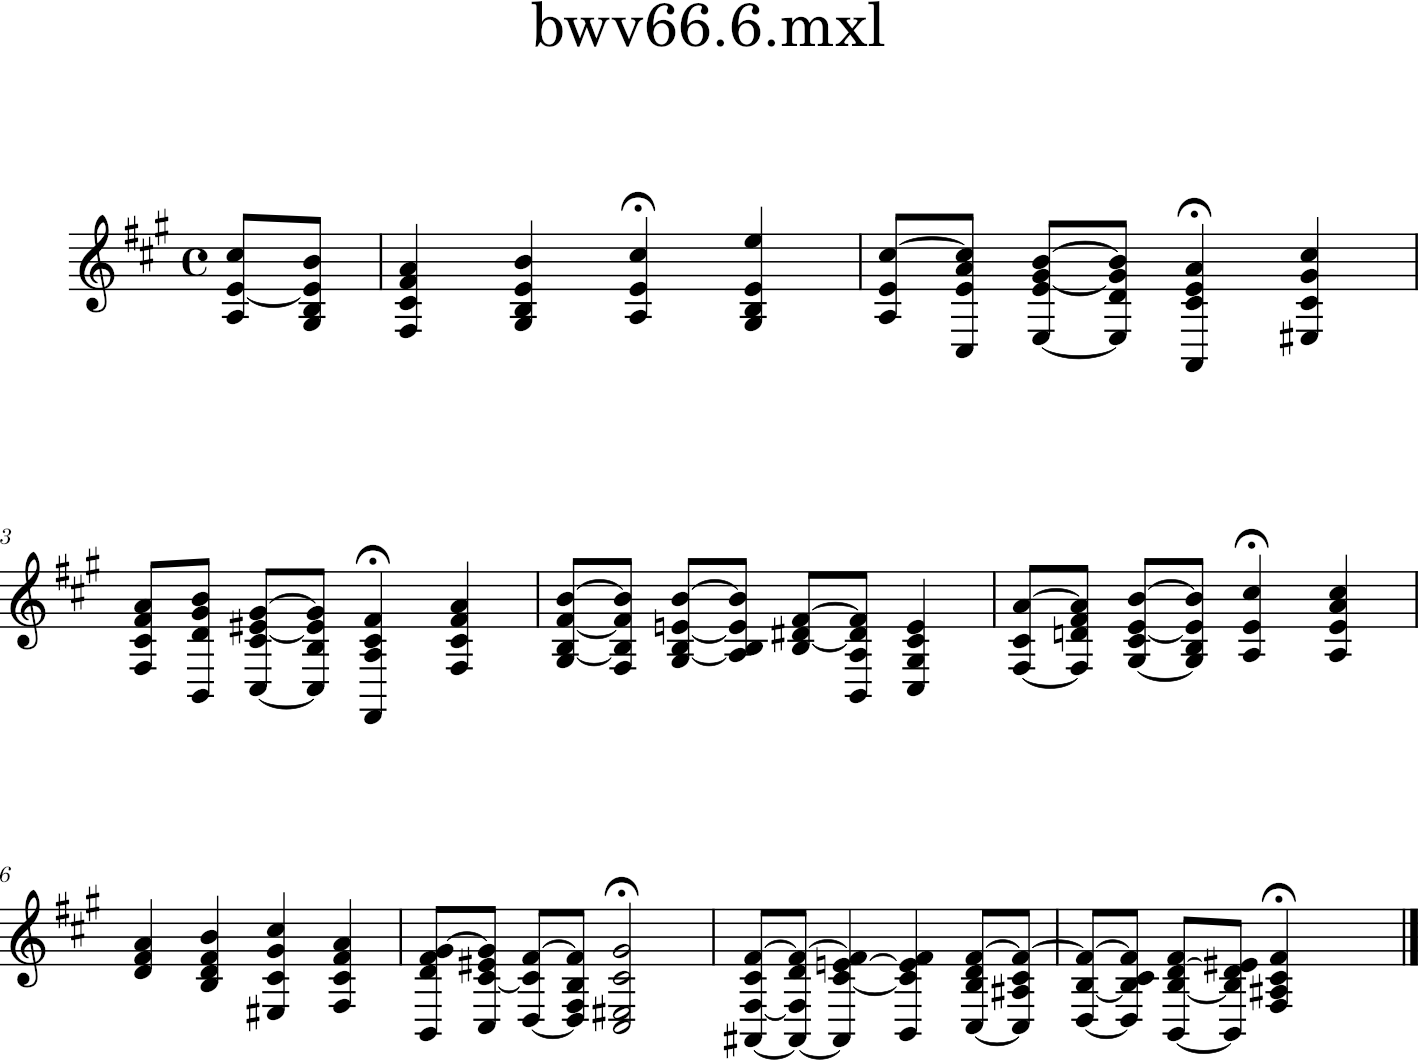

In [53]:
b = corpus.parse('bwv66.6')
bChords = b.chordify()
bChords.show()

In [ ]:
b.insert(0, bChords)

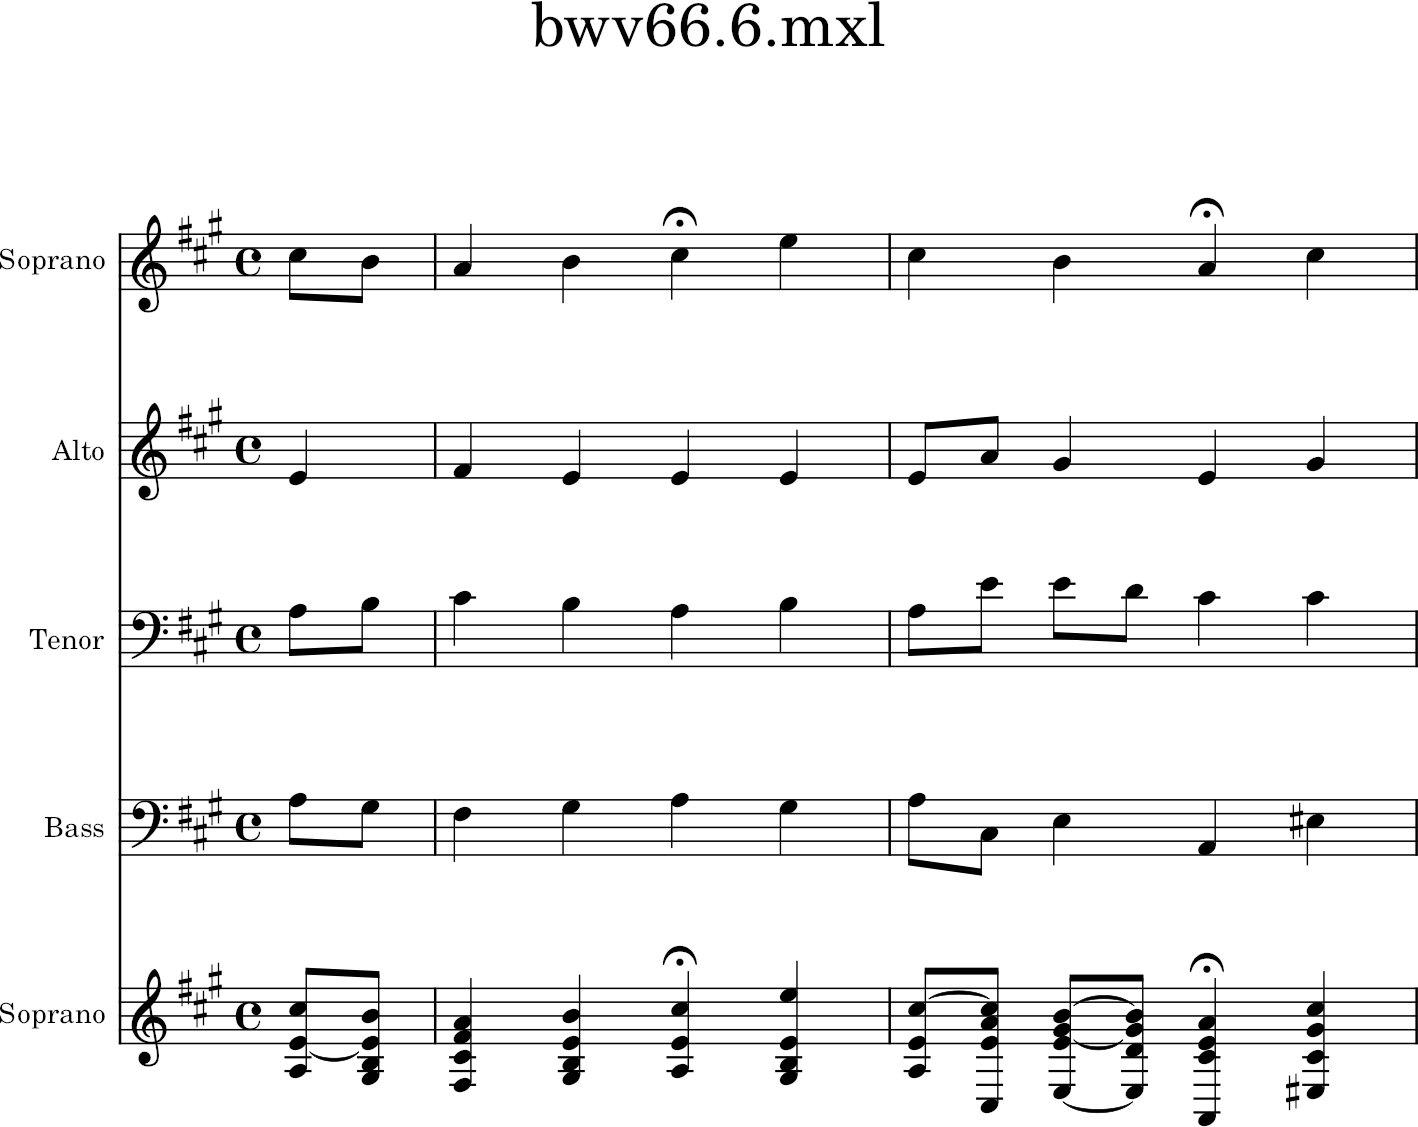

In [56]:
b.measures(0, 2).show()

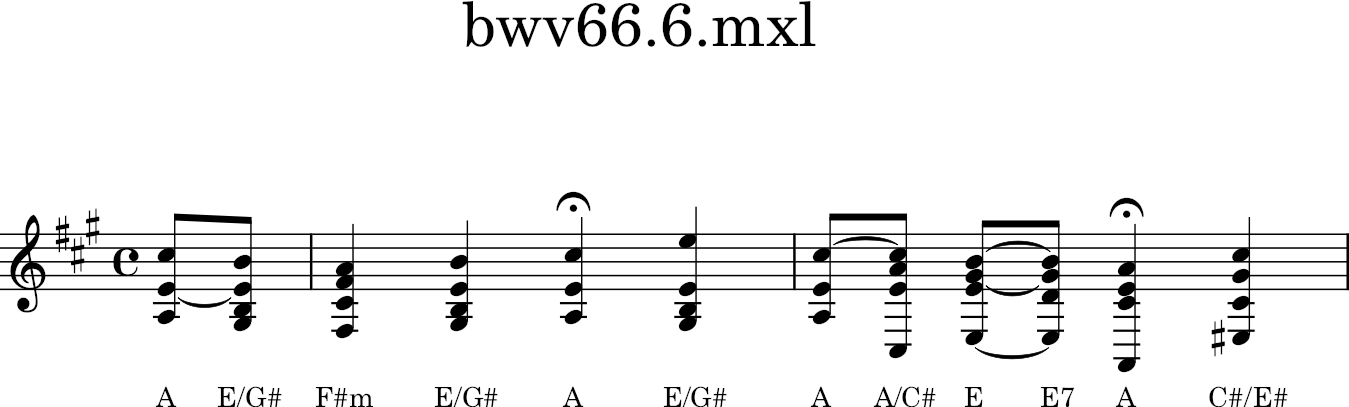

In [61]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    h, _ = harmony.chordSymbolFigureFromChord(c, key.Key("A"))
    c.lyrics.clear()
    c.addLyric(h)

bChords.measures(0, 2).show()

In [60]:
harmony.chordSymbolFigureFromChord(chord4, key.Key("C"))

('G7/D', 'dominant-seventh')

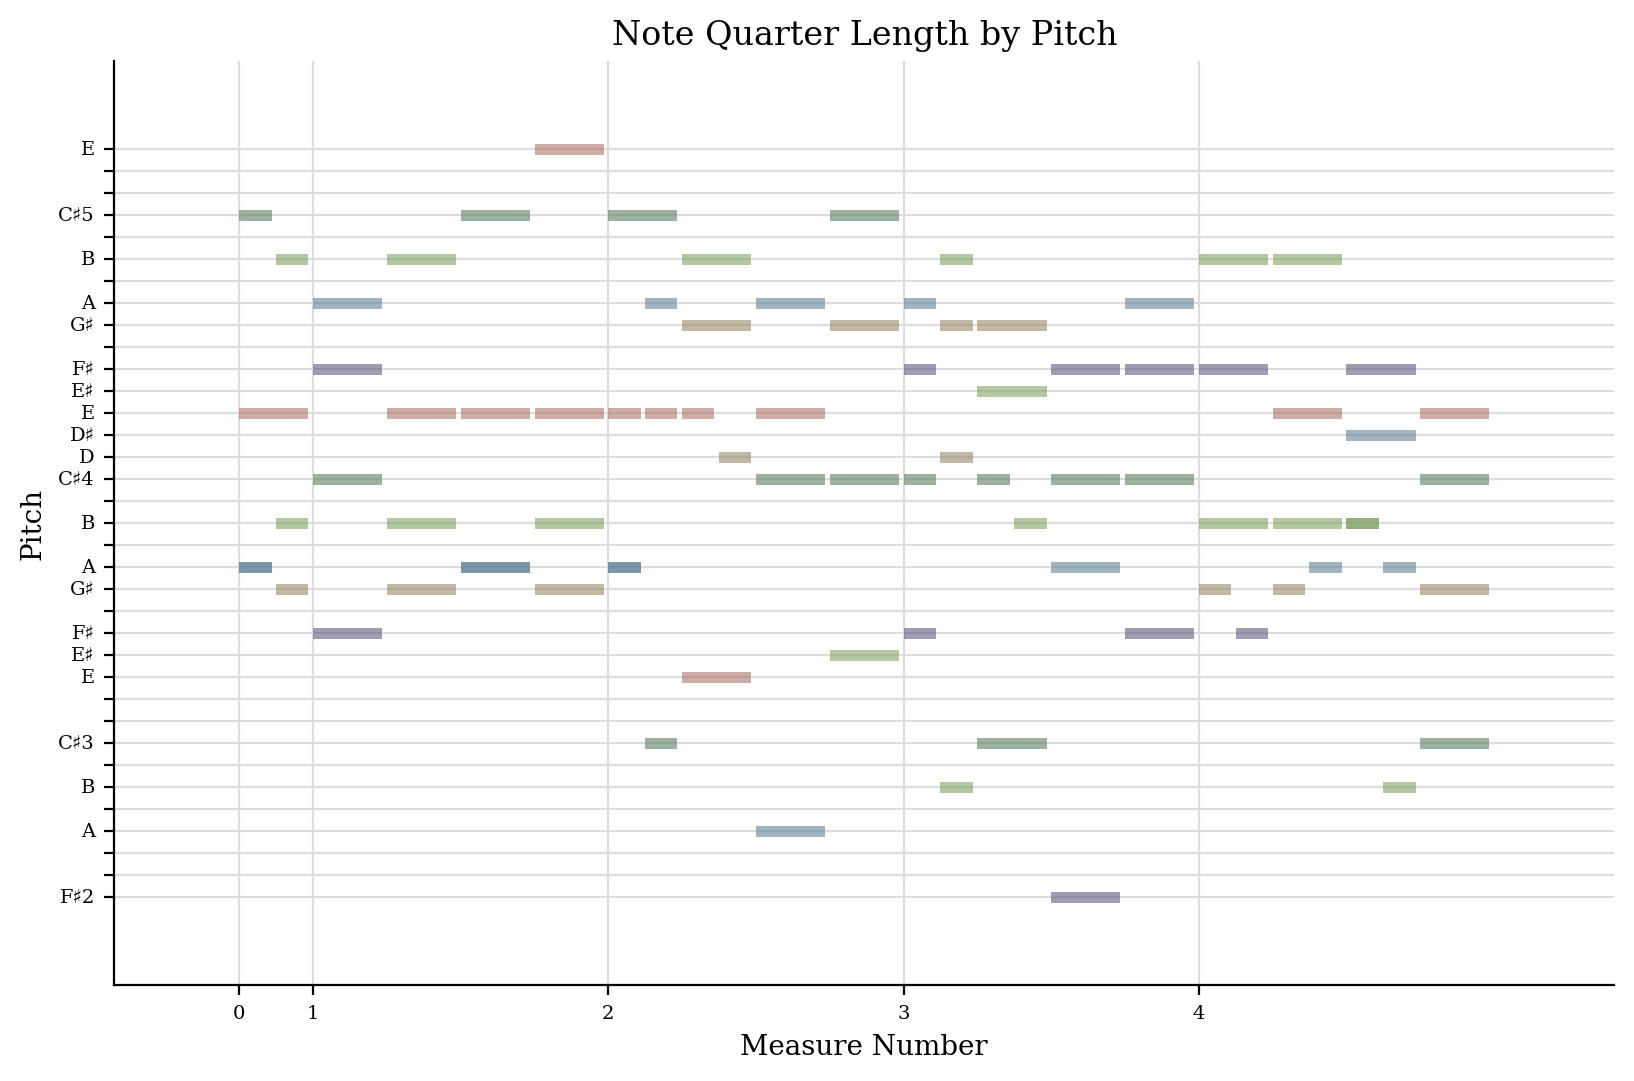

In [ ]:
# import matplotlib.pyplot as plt
b = corpus.parse('bwv66.6')
b.measures(0, 4).plot()

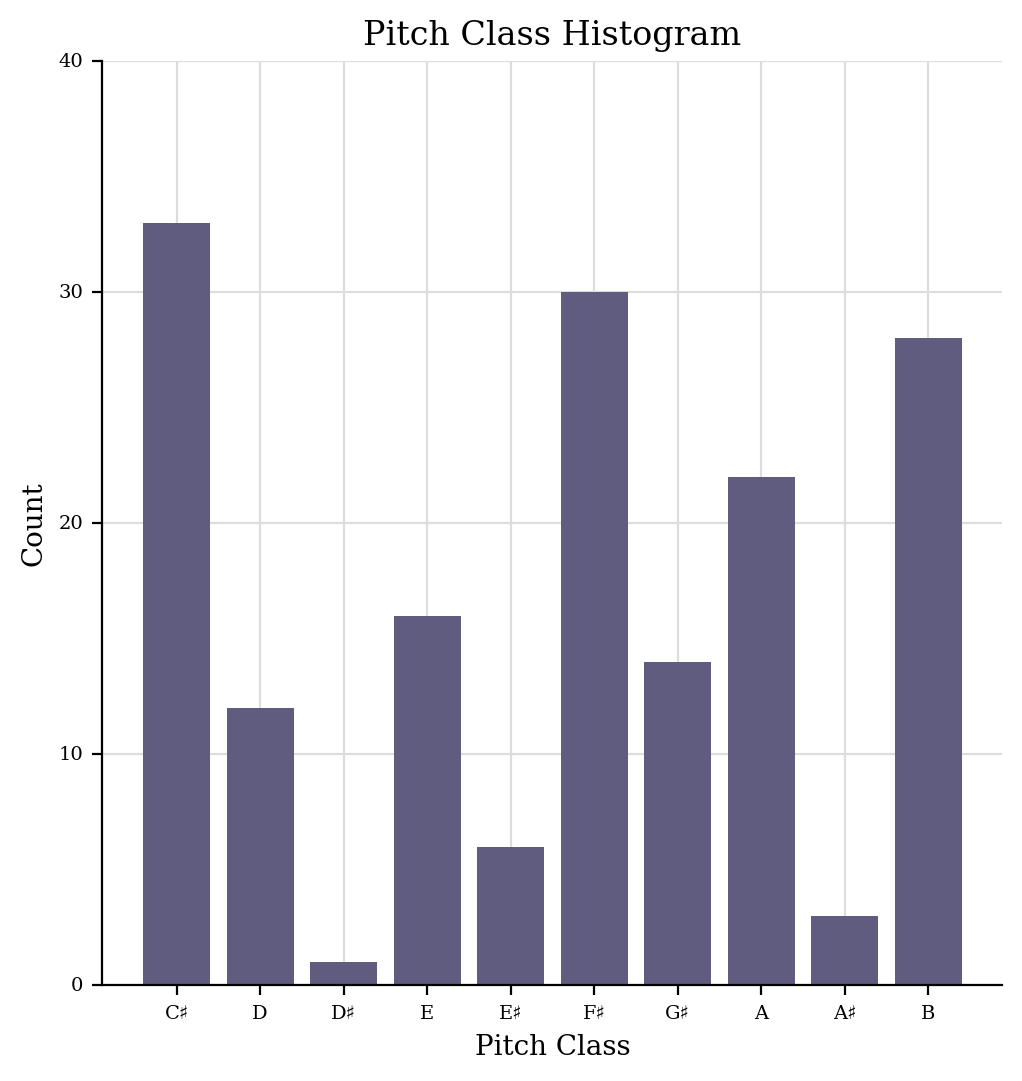

In [ ]:
b.plot("histogram", "pitchClass")

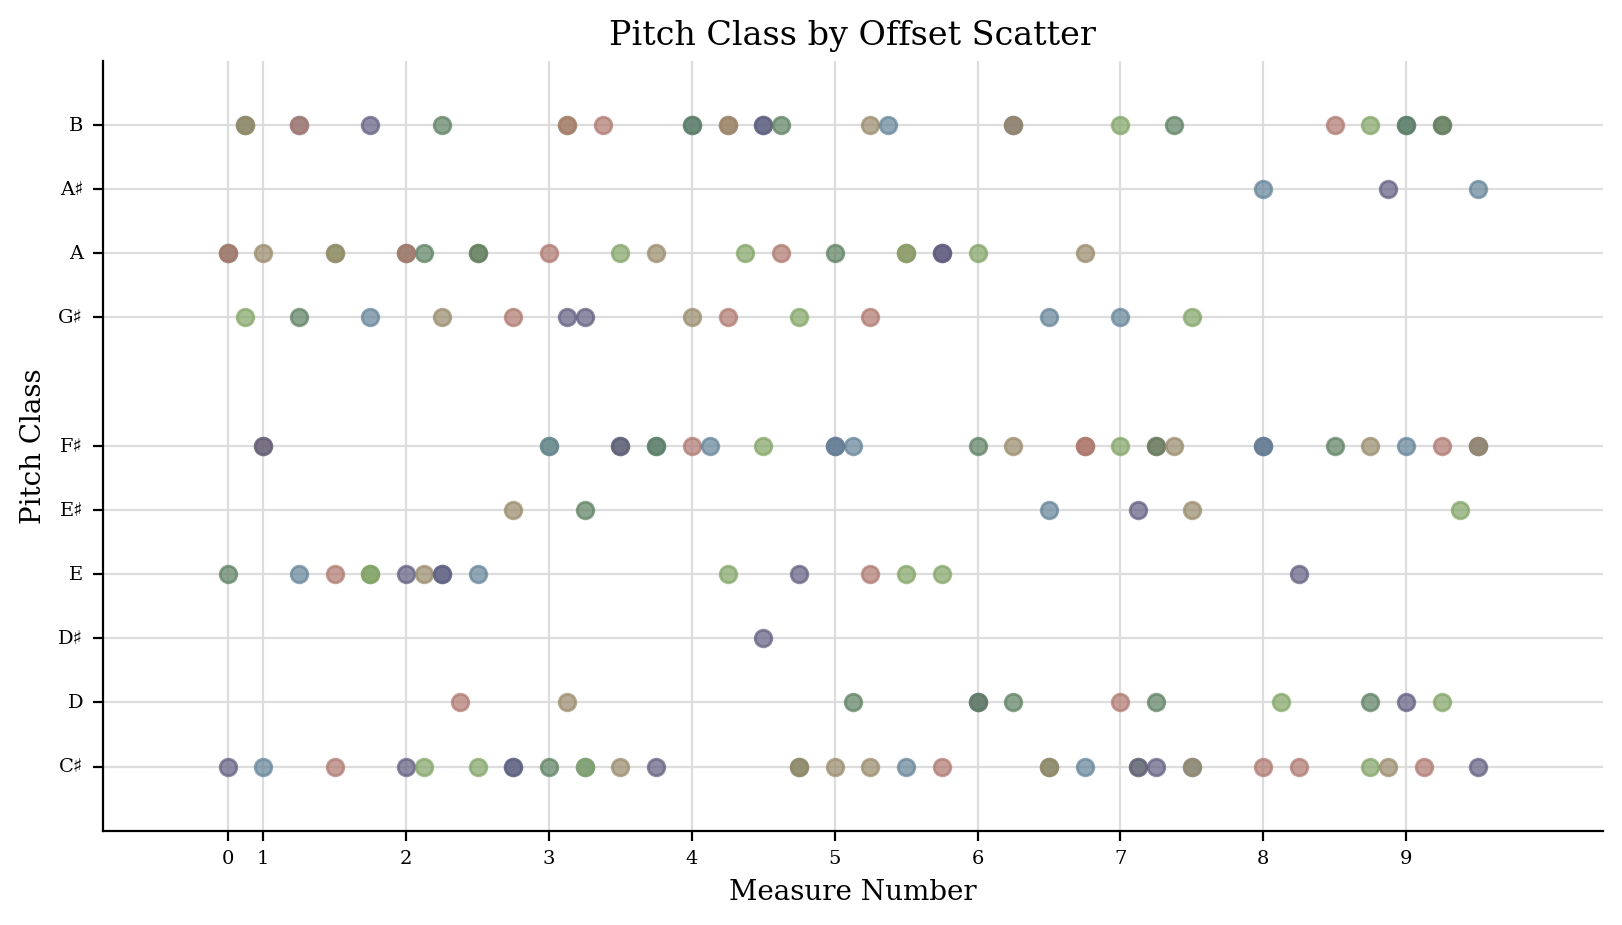

In [65]:
b.plot("scatter", "measure", "pitchClass")

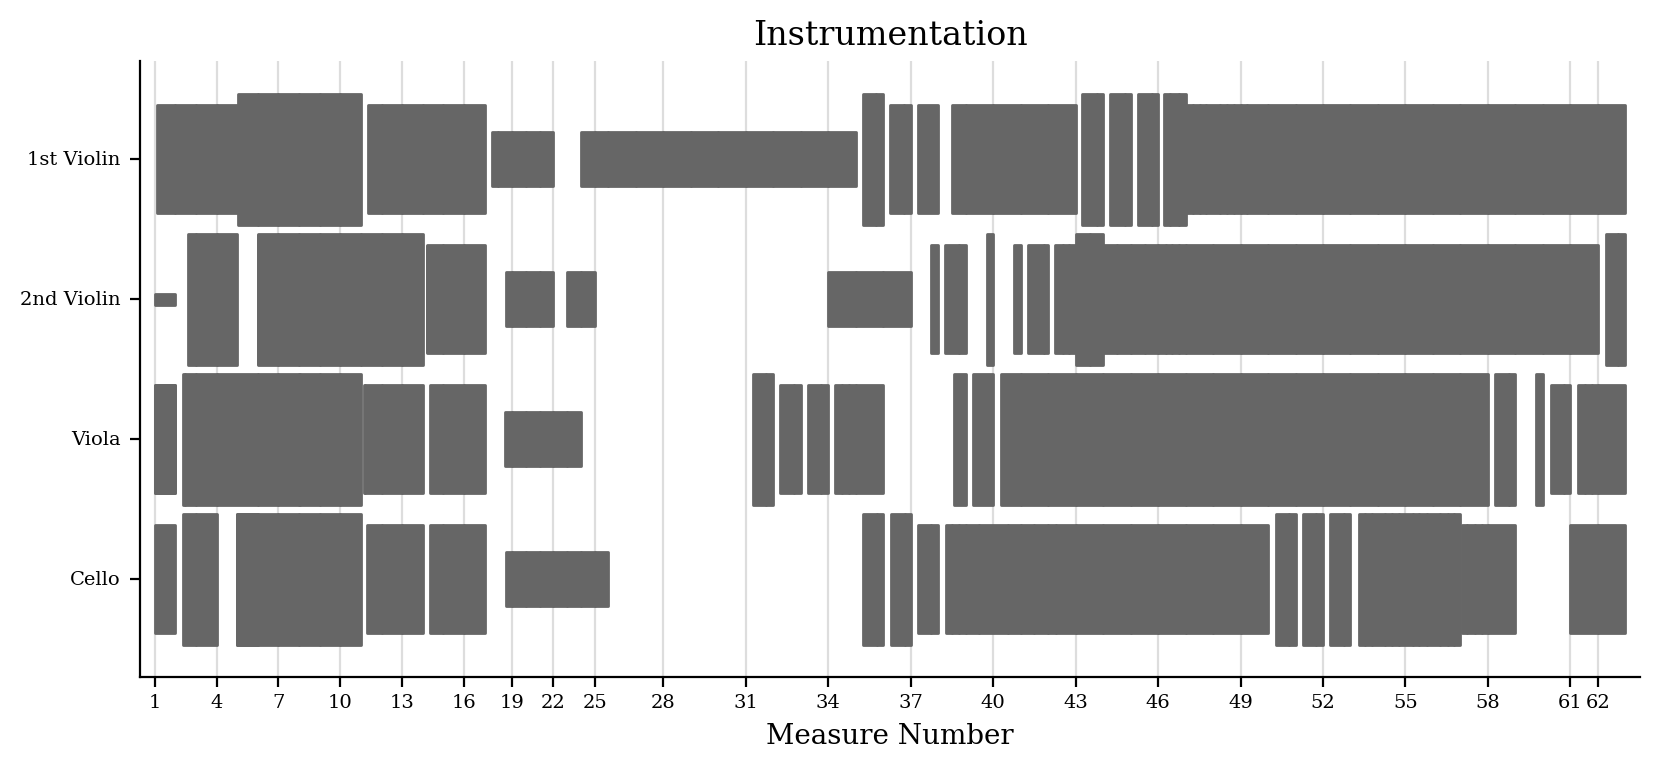

In [67]:
bt = corpus.parse("beethoven/opus133.xml")
bt.measures(0, 62).plot("dolan", fillByMeasure=True, segmentByTarget=True)